In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path
indata = np.loadtxt('cities.dat',delimiter=",",skiprows=4,dtype=str)

for i in range(indata.shape[0]):
    #row = row.strip(";")
    indata[i][1] = indata[i][1].strip(";")

indata = indata.astype(float)

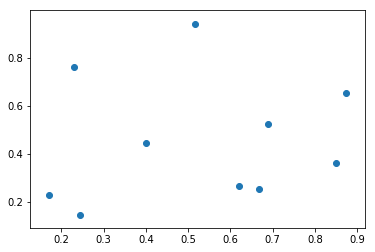

In [2]:
plt.scatter(indata[:,0],indata[:,1])
plt.show()

In [28]:
def init_weights():
    np.random.seed(42)
    weights = np.random.rand(10,2)
    return weights

weights = init_weights()

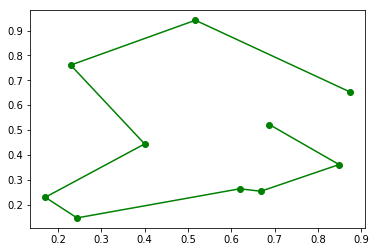

In [50]:
#Calculates similarity between a pattern (animal) and weights, choses the weightnode with smallest distance
def similarity(indata):
    winner = 1000
    winnerNode=0
    for i in range(weights.shape[0]):
        sub = np.subtract(indata,weights[i])
        sim = np.dot(sub.T,sub)
        if sim < winner:
            winner = sim
            winnerNode=i
    return winnerNode
            
#Takes the index of the winner node, uses the window to call update weight function for
#appropriate neighbours
def getNeighbours(size, winner, ind): 
    indexes = []
    
    if(size>0):
        for i in range(winner-size,winner+size):
            tmp = i%10
            indexes.append(tmp)
    else:
        indexes.append(winner)
        
    indexes = np.array(indexes)
    updateWeights(indexes, ind)

#Updates weight W[i]
def updateWeights(weightIndex, ind, eta = 0.2):
    for i in np.nditer(weightIndex):
        weights[i] = weights[i] + eta*(np.subtract(ind,weights[i]))

#Trains a SOM
def trainSOM(epochs=20):
    size = 2 #Size of neighbourhood
    #For each pattern in indata
    for epoch in range(epochs): #20 is standard
        for i in range(indata.shape[0]):
            winnerNode=similarity(indata[i]) #Find best node
            getNeighbours(size, winnerNode, indata[i]) #Get list of neighbours with winnerNode in center
        
        #Update size of neighbourhood
        if epochs<15:
            size=1
        elif epochs<10:
            size = 0
    
#Creates a SOM based on training and plots tour
def predictSOM():
    pos=[]
    #Loop through animals
    for i in range(indata.shape[0]):
            winnerNode=similarity(indata[i]) #Find best node
            pos.append([winnerNode,indata[i][0],indata[i][1]])
        
    pos = np.array(pos,dtype=object)
    pos = pos[pos[:,0].argsort()]
    
    #for i in range(pos.shape[0]):
    plt.plot(pos[:,1],pos[:,2],linestyle='-', marker='o',color="g")
    path = Path(pos[:,1:])
    #plt.plot(path) #spara denna
    plt.show()
    
        
trainSOM()       
predictSOM()
    
#Visualize this later